In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 

In [4]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day10\milk.csv", index_col =0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [5]:
clf = IsolationForest(contamination=0.05, random_state=24)
clf.fit(df)
predictions = clf.predict(df)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(df.index[abn_ind])


%age of outliers=8.0%
Outliers:
Index(['SEAL', 'DOLPHIN'], dtype='object', name='Animal')


In [6]:
###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_df)

print(np.cumsum(prcomp.explained_variance_ratio_))

[0.77575905 0.95323854 0.97902239 0.9987386  1.        ]


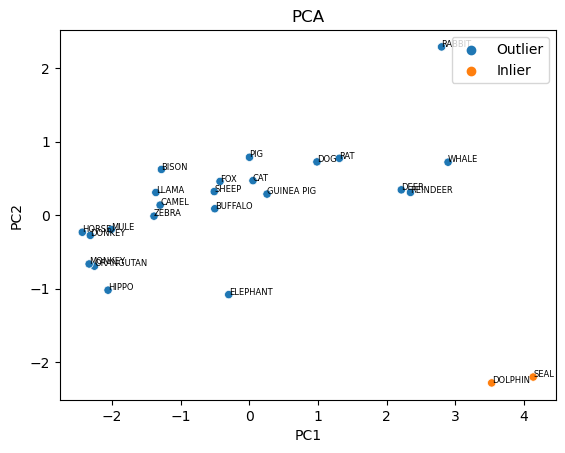

In [7]:
obs = np.where(predictions == -1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
for i in np.arange(0, df.shape[0] ):
    plt.text(scores[i,0], scores[i,1], 
             list(df.index)[i],fontsize=6)
plt.legend(loc='best')
plt.title("PCA")
plt.show()

In [8]:
df1 = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\nutrient.csv", index_col =0)
df1.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [11]:
clf = IsolationForest(contamination=0.05, random_state=24)
clf.fit(df1)
predictions = clf.predict(df1)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(df1.index[abn_ind])


%age of outliers=7.4074074074074066%
Outliers:
Index(['BEEF ROAST', 'CLAMS CANNED'], dtype='object', name='Food_Item')


In [12]:
###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_df1)

print(np.cumsum(prcomp.explained_variance_ratio_))

[0.43926469 0.66844264 0.83798533 0.99967967 1.        ]


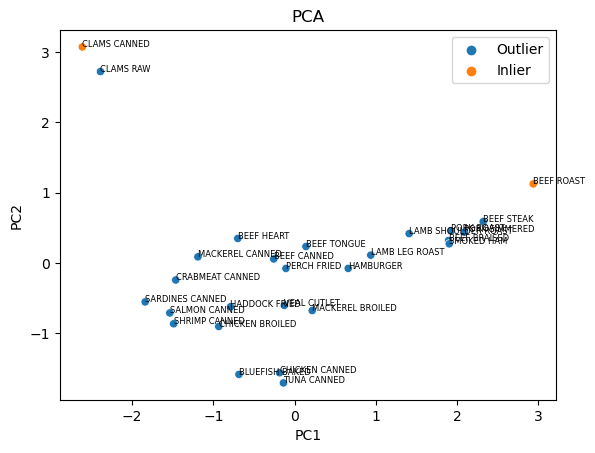

In [15]:
obs = np.where(predictions == -1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
for i in np.arange(0, df1.shape[0] ):
    plt.text(scores[i,0], scores[i,1], 
             list(df1.index)[i],fontsize=6)
plt.legend(loc='best')
plt.title("PCA")
plt.show()